# Muscle Space Projection and Segmental Level Reflexes

## Introduction

The application of muscle space projection on modeling segmental level reflexes
is presented. This projection exhibits several advantages in problems related to
the segmental level coordination, mainly because of the different muscle related
variables (e.g. length, velocity and muscle stiffness) that are
directly/indirectly controlled by the central nervous system (CNS). For example,
the proprioceptive receptors, located in the spinal cord, constantly measure the
evolution of these variables and issue corrective actions. More specifically,
the muscle spindle organs measure changes in the muscle length and the Golgi
tendon organs measure the force exerted by their respective muscles. This
indicates that the aforementioned variables are used in an internal feedback
regulation process. Muscle space projection will be used as an ID (Inverse
Dynamics) controller, in order to find the muscle forces ($f_m$) that achieve
the objective goal ($\ddot{l}_{m}$). These forces can consequently actuate the
model in a FD (Forward Dynamics) manner and the resultant movement can be
assessed.

## Muscle Space Projection

The musculotendon length is given as a function of the generalized coordinates
($q$) 


\begin{equation}\label{equ:muscle-length}
  l_{m} = f(q),\; l_{m} \in \Re^{m},\; q \in \Re^{n},\; n < m
\end{equation}
  

implying that the generalized coordinates fully define the musculotendon
lengths, assuming that the muscles are pretensioned. The derivative of with
respect to time is given by
 

\begin{equation}\label{equ:moment-arm}
  \dot{l}_{m} = R(q) \dot{q}, \; R(q) =
  \begin{bmatrix}
    \frac{\partial f_1}{\partial q_1} & \cdots & \frac{\partial f_1}{\partial q_n} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial f_m}{\partial q_1} & \cdots & \frac{\partial f_m}{\partial q_n}
  \end{bmatrix}
\end{equation}


\begin{equation}\label{equ:muscle-joint-acc}
  \ddot{l}_{m} = \dot{R}\dot{q} + R\ddot{q}
\end{equation}


\begin{equation}\label{equ:muscle-length-acc}
  \ddot{l}_{m} = \dot{R} \dot{q} + R \ddot{q} +
  \dot{N}_{R} \dot{l}_{m0} + N_{R} \ddot{l}_{m0}
\end{equation}


The muscle moment arm matrix ($R$) defines a dual relation between motion and
force quantities. The virtual work principle can be used to establish the link
between muscle and join space forces (augmented by the null space)


\begin{equation}\label{equ:joint-muscle-forces-vw}
  \begin{aligned}
    \tau^T \delta q &= -f_m^T \delta l_{m} \\
    \tau^T \delta q &= -f_m^T R \delta q \\
    \tau &= -R^T f_m + N_{R} f_{m0}, \; N_{R} = (I - R R^+)
  \end{aligned}
\end{equation}


where $N_{R} \in \Re^{m \times m}$ represents the null space of $R$. Let the
joint space equations of motion (EoMs) have the following form


\begin{equation}\label{equ:eom-joint-space}
  \begin{gathered}
    M(q) \ddot{q} + f(q, \dot{q}) =  \tau  \\
    f(q, \dot{q}) = \tau_g(q) + \tau_c(q, \dot{q}) + \tau_{o}(q, \dot{q}) 
  \end{gathered}
\end{equation}


where $M \in \Re^{n \times n}$ denotes the symmetric, positive definite joint
space inertia mass matrix, $n$ the number of DoFs of the model and ${q, \dot{q},
\ddot{q}} \in \Re^{n}$ the joint space generalized coordinates and their
derivatives with respect to time. The term $f \in \Re^{n}$ is the sum of all
joint space forces, $\tau_g \in \Re^{n}$ the gravity, $\tau_c \in \Re^{n}$ the
Coriolis and centrifugal and $\tau_{o} \in \Re^{n}$ other generalized
forces. Term $\tau \in \Re^{n}$ represents a vector of applied generalized
forces that actuate the model.

We can project the joint space EoMs in the muscle space by multiplying both
sides from the left with $-R M^{-1}$


\begin{equation}\label{equ:eom-muscle-space}
  \begin{gathered}
    -R M^{-1}M \ddot{q} - R M^{-1}f = -R M^{-1}\tau \\
    -(\ddot{l}_{m} - \dot{R}_t\dot{q} - \dot{N}_{R} \dot{l}_{m0} - N_{R} \ddot{l}_{m0}) -R M^{-1} f =
    R M^{-1} R^T f_m  \\
    \Lambda_m(\ddot{l}_{m} + b_m) + R^{+T} f = f_m^{\parallel} + f_m^{\perp}  
  \end{gathered}
\end{equation}


where $\Lambda_m=(RM^{-1}R^T)^{+} \in \Re^{m \times m}$ denotes the muscle space
inertia mass matrix and $b_m = - \dot{R}\dot{q} - \dot{N}_{R} \dot{l}_{m0}$ the muscle bias term. Note that
$\Lambda_m N_{R} \ddot{l}_{mt0}= 0$ and $\Lambda_m R M^{-1} = R^{+T}$. The
muscle forces $f_m$ can be expressed as the sum of two mutually orthogonal
subspaces that span the entire muscle space ($f_m = f_m^{\parallel} +
f_m^{\perp} \in \Re^{m}$). In this example, $f_m^{\perp}$ is appropriately
selected through an optimization such as that $f_m$ is the minimum effort
solution that satisfies the physiological constraints of the muscles ($0 \preceq
f_m \preceq f_{max}$).

## Muscle Space Projection and Reflexes

We continue with the design of a posture controller that coarsely encapsulates
the characteristics of the internal regulation process performed in the spinal
cord and the evaluation of system's response to external disturbances. As the
muscle length and its derivative are the regulating variables, muscle space
projection is a natural representation in this setting. The following control
scheme is adopted for this experiment


\begin{equation}\label{equ:posture-controller}
  \ddot{l}_{mt}(t) = k_p(l_{mt}^d - l_{mt}(t - \tau_{so})) - k_d \dot{l}_{mt}(t - \tau_{so})
\end{equation}


where $\ddot{l}_{mt}(t)$ denotes the muscle length acceleration goals, $l_{mt}^d
= l_{mt}(t=0)$ corresponds to the desired muscle length positions, $l_{mt}(t -
\tau_{so}), \dot{l}_{mt}(t - \tau_{so})$ the perceived, delayed ($\tau_{so} ~=
20ms$ originating from muscle spindle organs) muscle length positions and
velocities and $k_p, k_d$ the reflex gains. Note that this control law restores
the system to its original position $l_{mt}(t=0)$.

A force disturbance impulse in an arbitrary direction is applied on the end
effector body. The impulse is modeled by a Gaussian function


\begin{equation}\label{equ:gaussian}
  f(t) = a e^{\frac{-(t - t_0)}{2 \sigma^2}}
\end{equation}


where $a$ controls the magnitude, $t_0$ the application time and $\sigma$ the
outspread of the impulse. For the following experiments we will use
$a = 15, t_0 = 0.1, \sigma = 0.01$ and the direction of perturbation will
be the $-x$ direction.  In our experiments, $\vec{\dot{l}}_{m0}$ is set zero to 
encode an unbiased strategy, for the sake of simplicity,

In [1]:
# notebook general configuration

%load_ext autoreload
%autoreload 2

# imports and utilities
import numpy as np
import sympy as sp
from IPython.display import display, Image
sp.interactive.printing.init_printing()

import logging
logging.basicConfig(level=logging.INFO)

# plot
%matplotlib inline
from matplotlib.pyplot import *
rcParams['figure.figsize'] = (10.0, 6.0)

# utility for displaying intermediate results
enable_display  = True
def disp(*statement):
    if (enable_display):
        display(*statement)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# import necessary modules
from model import ArmModel
from projection import MuscleSpace
from controller import PosturalMuscleSpaceController
from simulation import Simulation

In [3]:
# construct model,

# Gravity is disabled to improve execution time during numerical integration
# note that if enabled, different PD gains are required to track the movement
# accurately. Furthermore, we disable the coordinate limiting and viscosity
# forces.
model = ArmModel(use_gravity=0, use_coordinate_limits=0, use_viscosity=0)
model.pre_substitute_parameters()

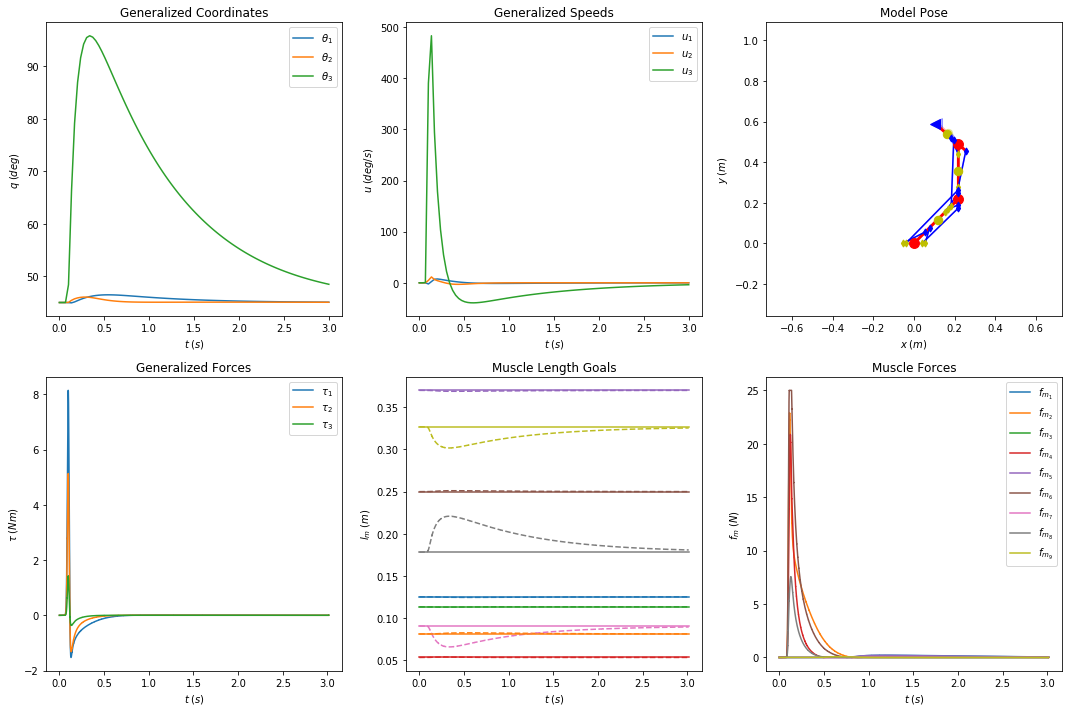

In [4]:
# simulation parameters
t_end = 3.0
kp = 10
kd = 10
delay = 0.02
a = 15
t0 = 0.1
sigma = 0.01
gamma = np.pi
use_optimization = True
base_dir = 'results/posture_control/'
format_ext = 'pdf'

# muscle space
muscle_space = MuscleSpace(model, use_optimization=use_optimization)
controller = PosturalMuscleSpaceController(model, muscle_space, kp, kd, delay,
                                           a, t0, sigma, gamma)

# numerical integration
simulation = Simulation(model, controller)
simulation.integrate(t_end)

# plot simulation results
fig, ax = subplots(2, 3, figsize=(15, 10))
simulation.plot_simulation(ax[0])
controller.reporter.plot_postural_muscle_space_data(ax[1])
fig.tight_layout()
fig.savefig(base_dir + 'posture_full.' + format_ext, format=format_ext, dpi=300)

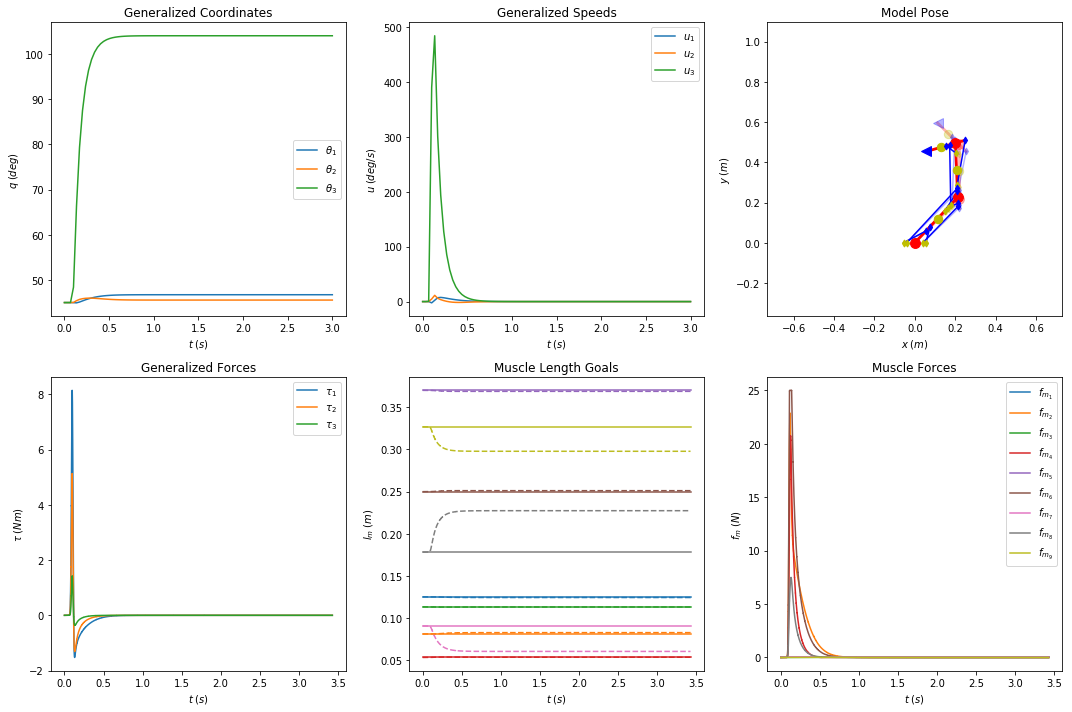

In [5]:
# simulation without the descending command (kp = 0)
kp = 0

# muscle space
muscle_space = MuscleSpace(model, use_optimization=use_optimization)
controller = PosturalMuscleSpaceController(model, muscle_space, kp, kd, delay,
                                           a, t0, sigma, gamma)

# numerical integration
simulation = Simulation(model, controller)
simulation.integrate(t_end)

# plot simulation results
fig, ax = subplots(2, 3, figsize=(15, 10))
simulation.plot_simulation(ax[0])
controller.reporter.plot_postural_muscle_space_data(ax[1])
fig.tight_layout()
fig.savefig(base_dir + 'posture_reflex.' + format_ext, format=format_ext, dpi=300)